# Importing Libraries

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [34]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning & Preprocessing

In [37]:
df.drop("Cabin",axis = 1,inplace = True)

In [38]:
df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))

In [39]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


C:\Users\thris\AppData\Local\Temp\ipykernel_7592\585847971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [40]:
df.duplicated().sum()

0

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
df_encode = pd.get_dummies(df,columns =["Embarked"],drop_first = True) #Encoding

In [43]:
df_encode["Embarked_Q"] = df_encode["Embarked_Q"].astype(int)
df_encode["Embarked_S"] = df_encode["Embarked_S"].astype(int)


In [44]:
df_encode["Sex"] = df_encode["Sex"].map({"male":0,"female":1})

In [13]:
df_encode.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [45]:
df_encode.drop(["PassengerId","Name","Ticket"],axis = 1, inplace = True)

In [46]:
df_encode.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


# Correlation

In [47]:
df_encode.corr(numeric_only = True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.059579,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.131900,-0.413583,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,0.543351,-0.131900,1.000000,-0.102706,0.114631,0.245489,0.182333,0.074115,-0.119224
Age,-0.059579,-0.413583,-0.102706,1.000000,-0.249854,-0.175526,0.122692,-0.092418,0.022141
SibSp,-0.035322,0.083081,0.114631,-0.249854,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,0.081629,0.018443,0.245489,-0.175526,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.257307,-0.549500,0.182333,0.122692,0.159651,0.216225,1.000000,-0.117216,-0.162184
Embarked_Q,0.003650,0.221009,0.074115,-0.092418,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.119224,0.022141,0.068734,0.060814,-0.162184,-0.499421,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

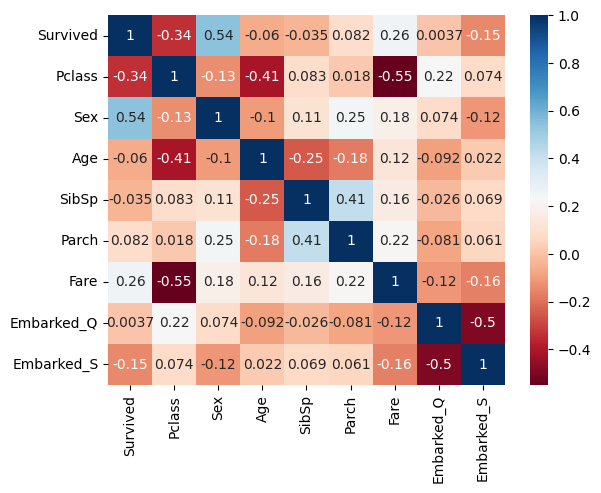

In [59]:
sns.heatmap(df_encode.corr(numeric_only = True),annot = True,cmap = 'RdBu')
plt.show

In [60]:
df_encode.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


# Data Splitting

In [61]:
X = df_encode[["Pclass", "Sex","Embarked_S","Fare"]]
y = df_encode["Survived"]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

# Scaling using Standard Scaler

In [63]:
scale = StandardScaler()
X_train_scaler = scale.fit_transform(X_train)
X_test_scaler = scale.fit_transform(X_test)

# Model fitting

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)  
y_pred = model.predict(X_test) 

# Accuracy Score and F1 score

In [65]:
accuracy = accuracy_score(y_test,y_pred)
f1_s = f1_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("F1 Score: ",f1_s)


Accuracy:  0.770949720670391
F1 Score:  0.7248322147651006


# The model neither overfitting nor underfitting

In [66]:
train_pre = model.predict(X_train)
test_pre = model.predict(X_test)

train_accuracy = accuracy_score(y_train,train_pre)
test_accuracy = accuracy_score(y_test,test_pre)

train_f1_s = f1_score(y_train,train_pre)
test_f1_s = f1_score(y_test,test_pre)

print("Train Accuracy: ",train_accuracy)
print("Test_Accuracy: ",test_accuracy)
print("Train_F1_score: ",train_f1_s)
print("Test_F1_score: ",test_f1_s)


Train Accuracy:  0.7851123595505618
Test_Accuracy:  0.770949720670391
Train_F1_score:  0.7129455909943715
Test_F1_score:  0.7248322147651006


# User input for testing the model

In [73]:
def user_input():
    print("\n🎯 Enter passenger details to predict survival:")
    pclass = int(input("Pclass (1 = 1st, 2 = 2nd, 3 = 3rd): "))
    sex = int(input("Sex (0 = Male, 1 = Female): "))
    embarked_s = int(input("Embarked from Southampton? (1 = Yes, 0 = No): "))
    fare = float(input("Fare (ticket price): "))

    
    input_data = pd.DataFrame([{
    "Pclass":pclass,
    "Sex":sex,
    "Embarked_S":embarked_s,
    "Fare":fare
    }])

    return input_data


def survived_rate(model):
    user_in = user_input()
    predictions = model.predict(user_in)[0]
    prediction_prob = model.predict_proba(user_in)[0][1]
    print("The prediction of survival: ",predictions)
    print("The probability of survival: ",prediction_prob)

survived_rate(model)
    
    


🎯 Enter passenger details to predict survival:


Pclass (1 = 1st, 2 = 2nd, 3 = 3rd):  1
Sex (0 = Male, 1 = Female):  1
Embarked from Southampton? (1 = Yes, 0 = No):  1
Fare (ticket price):  80


The prediction of survival:  1
The probability of survival:  0.8828354285916893
